# Early Stopping #
This is the concept to tell when we need to stop epoch. 

In Short how many epochs we should take we dont know initially, so, there is one function called 'callable' will stop epoch cycle after getting accuracy

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pylab import rcParams
import seaborn as sns
import warnings

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles



In [17]:
# dataset has been selected just for learning
x,y = make_circles(n_samples=100,noise=0.1,random_state=1)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [19]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model_log = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, verbose=0)

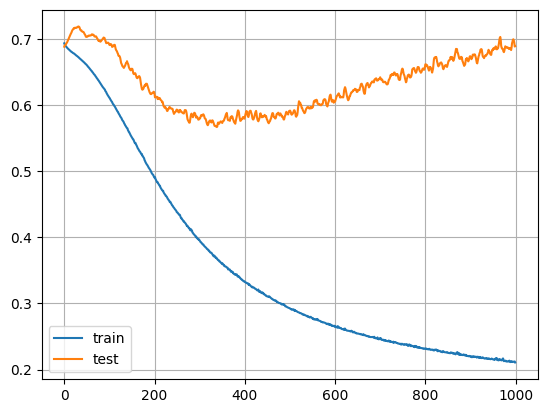

In [22]:
plt.plot(model_log.history['loss'],label='train')
plt.plot(model_log.history['val_loss'],label='test')
plt.grid()
plt.legend()
plt.show()

# Here, we can see at one point, loss is increasing for testing phase.

# Early Stopping #


In [23]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
earlySFunction = EarlyStopping(
    monitor = 'val_loss', # On which field you want to keep early stopping
    min_delta = 0.00001,  # 
    patience = 20, # numbers of epochs with no imrpovemnent after which training will be stopped.
    verbose = 1, # 1: will display msg when to stop, 0: no msg will be printed

    # mode = "max" | it will stop when the quantity monitored has stopped increasing
    # mode = "min" | it will stop when the quantity monitored has stopped Descreasing
    # mode = "auto" | it will sutomatically inferred from the name of the monitored quantity
    mode = "auto", 
    baseline = None, # Training will stop if the model doesn't show improvement over the baseline
    restore_best_weights=False #
)

In [25]:
model_log = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, verbose=0, callbacks = earlySFunction)

Epoch 21: early stopping


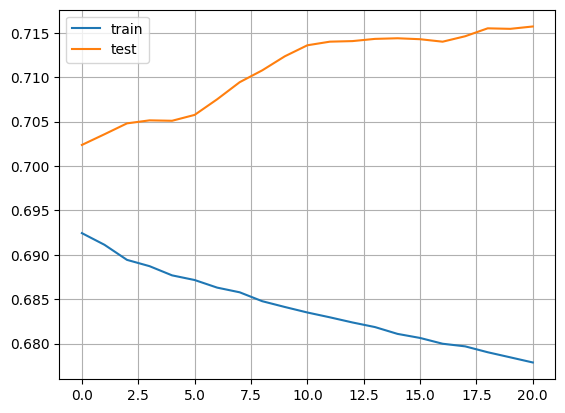

In [26]:
plt.plot(model_log.history['loss'],label='train')
plt.plot(model_log.history['val_loss'],label='test')
plt.grid()
plt.legend()
plt.show()